# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Faizal Kurniawan]
- **Email:** [faizal041015@gmail.com]
- **ID Dicoding:** [faizal_kurniawan]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi geografis pelanggan berdasarkan kotanya?
- Bagaimana distribusi jumlah review berdasarkan review score yang diberikan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

import zipfile
import os

## Data Wrangling

### Gathering Data

In [2]:
# URL unduhan langsung Google Drive
url = "https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK"
output_zip = "file.zip"

# Unduh file zip menggunakan gdown
gdown.download(url, output_zip, quiet=False)

# Ekstrak file zip
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall("extracted")

# Hapus file zip setelah ekstraksi (opsional)
os.remove(output_zip)

# Temukan file CSV dalam folder hasil ekstraksi
extracted_folder = "extracted"
csv_file_path = None
for root, dirs, files in os.walk(extracted_folder):
    for file in files:
        if file.endswith(".csv"):
            csv_file_path = os.path.join(root, file)
            break

# Pastikan file CSV ditemukan sebelum mencoba membacanya
if csv_file_path:
    # Baca file CSV dengan Pandas
    df = pd.read_csv(csv_file_path)
    print(df.head())
else:
    print("File CSV tidak ditemukan dalam folder hasil ekstraksi.")

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=0d6f9b9a-1acf-4b37-8560-7c93cb4a1f70
To: /content/file.zip
100%|██████████| 44.9M/44.9M [00:01<00:00, 30.5MB/s]


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [3]:
customers_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category_name_translation_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv("/content/extracted/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

**customers** : clean

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**geolocation** : 261831 duplicates

In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**order items** : data type shipping limit date

In [16]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**order payments** : clean

In [18]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**order reviews** : data type creation date & answer timestamp, missing values review comment title & message

In [20]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**orders** : data type order purchase timestamp, approved at, delivered carrier date, delivered customer date, estimated delivery date, missing values order approved at, delivered carrier date, delivered customer date

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**product category name translation** : clean

In [26]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**products** : missing values product category name, name lenght, description lenght, photos qty, weight_g, length_cm, height_cm, width_cm

In [28]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [29]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [30]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**sellers** : clean

In [31]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [32]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

**geolocation** : menghapus duplicate

In [33]:
# Menampilkan informasi duplicates sebelum cleaning
print("duplicates sebelum cleaning:")
print(geolocation_df.duplicated().sum())

# Metode cleaning: Drop baris dengan missing values
geolocation_df.drop_duplicates(inplace=True)

# Menampilkan informasi duplicates setelah cleaning
print("\nduplicates setelah cleaning:")
print(geolocation_df.duplicated().sum())

duplicates sebelum cleaning:
261831

duplicates setelah cleaning:
0


**order items** : mengganti tipe data "shipping_limit_date" dari object menjadi datetime

In [34]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [35]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [36]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**order reviews** : mengganti tipe data "review_creation_date" dan "review_answer_timestamp" dari object menjadi datetime, lalu imputasi data missing values berdasarkan "review score"

In [37]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [38]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [39]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [40]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [41]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [42]:
# Menampilkan informasi missing values sebelum imputasi
print("Missing values sebelum imputasi:")
print(order_reviews_df.isnull().sum())

# Imputasi otomatis berdasarkan nilai review_score
def fill_review_comments(row):
    if row['review_score'] == 1:
        if pd.isnull(row['review_comment_title']):
            row['review_comment_title'] = "sangat buruk"
        if pd.isnull(row['review_comment_message']):
            row['review_comment_message'] = "sangat buruk"
    elif row['review_score'] == 2:
        if pd.isnull(row['review_comment_title']):
            row['review_comment_title'] = "buruk"
        if pd.isnull(row['review_comment_message']):
            row['review_comment_message'] = "buruk"
    elif row['review_score'] == 3:
        if pd.isnull(row['review_comment_title']):
            row['review_comment_title'] = "biasa aja"
        if pd.isnull(row['review_comment_message']):
            row['review_comment_message'] = "biasa aja"
    elif row['review_score'] == 4:
        if pd.isnull(row['review_comment_title']):
            row['review_comment_title'] = "baik"
        if pd.isnull(row['review_comment_message']):
            row['review_comment_message'] = "baik"
    elif row['review_score'] == 5:
        if pd.isnull(row['review_comment_title']):
            row['review_comment_title'] = "sangat baik"
        if pd.isnull(row['review_comment_message']):
            row['review_comment_message'] = "sangat baik"
    return row

# Terapkan fungsi fill_review_comments ke setiap baris DataFrame
order_reviews_df = order_reviews_df.apply(fill_review_comments, axis=1)

# Menampilkan informasi missing values setelah imputasi
print("Missing values setelah imputasi:")
print(order_reviews_df.isnull().sum())

Missing values sebelum imputasi:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Missing values setelah imputasi:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [43]:
# Membuat list untuk menyimpan DataFrame untuk setiap review_score
dataframes_by_review_score = []

# Melakukan iterasi untuk setiap review_score (1 hingga 5)
for score in range(1, 6):
    # Mengambil DataFrame untuk review_score tertentu
    df_score = order_reviews_df[order_reviews_df['review_score'] == score].head(3)
    # Menambahkan DataFrame tersebut ke dalam list
    dataframes_by_review_score.append(df_score)

# Menggabungkan DataFrame untuk setiap review_score menjadi satu DataFrame
result_df = pd.concat(dataframes_by_review_score)

# Menampilkan hasil
print("DataFrame untuk masing-masing review_score (3 baris per review_score):")
display(result_df)

DataFrame untuk masing-masing review_score (3 baris per review_score):


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,sangat buruk,sangat buruk,2018-04-13,2018-04-16 00:39:37
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,sangat buruk,Não gostei ! Comprei gato por lebre,2017-12-13,2017-12-16 07:14:07
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,buruk,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18,2018-01-20 21:25:45
40,ab3056e4fb5a36df4b58c1746e4a6b8f,aad1dcbe4c9fe2e3486e5e04c6649097,2,buruk,buruk,2018-05-13,2018-05-14 16:29:15
94,4d36f8266245b00faebc520e9cd963c0,b1cc044d321053348a5e482ca7e6b2e3,2,buruk,buruk,2018-03-17,2018-03-17 09:29:47
14,9a0abbb668bafb95a6d2b05db43284c4,d7bd0e4afdf94846eb73642b4e3e75c3,3,biasa aja,biasa aja,2017-04-30,2017-05-03 00:02:22
18,fdbdb2629a7cde0f66657acc92084e7f,70a752414a13d09cc1f2b437b914b28e,3,biasa aja,biasa aja,2017-09-29,2017-10-02 01:12:49
56,cb6fe4f91f83d9222b7c8e14959055e1,84226f5c73669d7711ca44aa9cac602a,3,biasa aja,biasa aja,2018-05-10,2018-05-13 22:51:53
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,baik,baik,2018-01-18,2018-01-18 21:46:59


In [44]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**orders** : mengganti tipe data "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", dan "order_estimated_delivery_date" dari object menjadi datetime, lalu imputasi data missing values menggunakan median dengan logika "order_approved_at", "order_delivered_carrier_date", dan "order_delivered_customer_date" berada antara 'order_purchase_timestamp' dan 'order_estimated_delivery_date' dan semuanya berurutan

In [45]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [46]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [47]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [48]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [49]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [50]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [51]:
orders_df = pd.read_csv('/content/extracted/E-Commerce Public Dataset/orders_dataset.csv', parse_dates=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
])

# Menampilkan informasi missing values sebelum imputasi
print("Missing values sebelum imputasi:")
print(orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().sum())

# Fungsi untuk imputasi dengan batasan
def impute_with_limits(df, col, lower_limit_col, upper_limit_col):
    median_val = df[col].median()
    df[col] = df.apply(
        lambda row: min(max(median_val, row[lower_limit_col]), row[upper_limit_col]) if pd.isnull(row[col]) else row[col],
        axis=1
    )

# Mengisi missing values dengan median, tetapi memastikan berada antara 'order_purchase_timestamp' dan 'order_estimated_delivery_date'
impute_with_limits(orders_df, 'order_approved_at', 'order_purchase_timestamp', 'order_estimated_delivery_date')
impute_with_limits(orders_df, 'order_delivered_carrier_date', 'order_purchase_timestamp', 'order_estimated_delivery_date')
impute_with_limits(orders_df, 'order_delivered_customer_date', 'order_purchase_timestamp', 'order_estimated_delivery_date')

# Menampilkan informasi missing values setelah imputasi
print("Missing values setelah imputasi:")
print(orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().sum())

Missing values sebelum imputasi:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64
Missing values setelah imputasi:
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64


In [52]:
# Menentukan order_id yang ingin ditampilkan
specific_order_ids = [
    "00b1cb0320190ca0daa2c88b35206009", #sample order id, di mana order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date NaT
    "136cce7faa42fdb2cefd53fdc79a6098", #sample order id, di mana order_delivered_carrier_date dan order_delivered_customer_date NaT
    "6942b8da583c2f9957e990d028607019"  #sample order id, di mana order_delivered_customer_date NaT
]

# Memilih baris dengan order_id tertentu
specific_orders = orders_df.loc[orders_df['order_id'].isin(specific_order_ids)]

# Menampilkan data dalam bentuk tabel
print("Data untuk order_id tertentu:")
display(specific_orders)

Data untuk order_id tertentu:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09 00:00:00,2017-05-09 00:00:00.000,2017-05-09
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,2018-02-02 19:28:10.500,2018-02-07
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-08-28 15:26:39.000,2018-09-12


In [53]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**products** : drop duplicates karena jumlah data yang memiliki missing values relatif kecil dibandingkan dengan total jumlah baris, dan data yang missing values bisa kehilangan 4 hingga 8 kolom informasi dari 9 kolom informasi yang ada dan berarti terlalu banyak informasi yang sudah hilang sehingga data tersebut bisa dihapus saja

In [54]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [55]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [56]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [57]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [58]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [59]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [60]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Menampilkan informasi missing values sebelum cleaning
print("Missing values sebelum cleaning:")
print(products_df.isnull().sum())

# Metode cleaning: Drop baris dengan missing values
products_df.dropna(inplace=True)

# Menampilkan informasi missing values setelah cleaning
print("\nMissing values setelah cleaning:")
print(products_df.isnull().sum())

Missing values sebelum cleaning:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing values setelah cleaning:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [65]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

Analisis Demografi Pelanggan

In [66]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [67]:
# Menghitung jumlah pelanggan untuk setiap kota
city_distribution = customers_df['customer_city'].value_counts()

print("Jumlah pelanggan untuk setiap kota:")
print(city_distribution)

Jumlah pelanggan untuk setiap kota:
customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64


In [68]:
# Memilih 10 kota dengan pelanggan terbanyak
top_10_cities = city_distribution.head(10)
print(top_10_cities)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


In [69]:
# Menghitung total pelanggan
total_customers = customers_df['customer_city'].count()

print(f"Total jumlah pelanggan: {total_customers}")

Total jumlah pelanggan: 99441


In [70]:
# Menampilkan kota dengan jumlah pelanggan paling banyak dan paling sedikit
most_customers_city = city_distribution.idxmax()
least_customers_city = city_distribution.idxmin()

print(f"Kota dengan jumlah pelanggan paling banyak: {most_customers_city} ({city_distribution[most_customers_city]} pelanggan)")
print(f"Kota dengan jumlah pelanggan paling sedikit: {least_customers_city} ({city_distribution[least_customers_city]} pelanggan)")

Kota dengan jumlah pelanggan paling banyak: sao paulo (15540 pelanggan)
Kota dengan jumlah pelanggan paling sedikit: virginia (1 pelanggan)


Analisis Kepuasan Pelanggan

In [71]:
# Menghitung jumlah review untuk setiap score
review_count = order_reviews_df['review_score'].value_counts().sort_index()

# Menampilkan jumlah review untuk setiap score
print("Jumlah review untuk setiap score:")
print(review_count)

Jumlah review untuk setiap score:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


In [72]:
# Menghitung total review
total_reviews = order_reviews_df['review_score'].count()

# Menampilkan total review
print(f"Total jumlah review: {total_reviews}")

Total jumlah review: 99224


In [73]:
# Menghitung rata-rata review score
average_review_score = order_reviews_df['review_score'].mean()

# Menampilkan rata-rata review score
print(f"Rata-rata review score yang diberikan oleh pelanggan: {average_review_score:.2f}")

Rata-rata review score yang diberikan oleh pelanggan: 4.09


## Visualization & Explanatory Analysis

Dari Analisis Demografi Pelanggan dan Analisis Kepuasan Pelanggan, pertanyaan bisnis "Bagaimana distribusi geografis pelanggan berdasarkan kotanya?" dan "Bagaimana distribusi jumlah review berdasarkan review score yang diberikan oleh pelanggan?" dapat terjawab.

### Pertanyaan 1: Bagaimana distribusi geografis pelanggan berdasarkan kotanya?

<ipython-input-74-0d97eb1fe0f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')


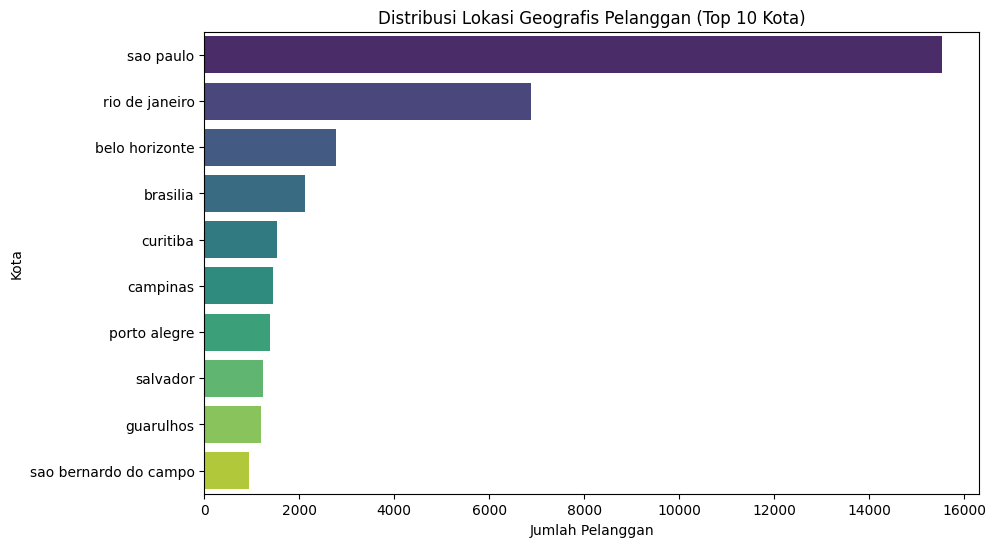

In [74]:
# Visualisasi distribusi geografis pelanggan untuk 10 kota teratas
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
plt.title('Distribusi Lokasi Geografis Pelanggan (Top 10 Kota)')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan dari Brazilian E-Commerce Public Dataset by Olist ini didominasi oleh pelanggan dari kota sao paulo dengan jumlah 15540 pelanggan. Hampir 3x lipat dari urutan kota kedua, yaitu rio de janeiro dengan 6882 pelanggan. Jumlah pelanggan dari kota rio de janeiro pun hampir 3x lipat dari urutan kota ketiga juga, yaitu belo horizonte dengan 2773 pelanggan. Selanjutnya, di urutan ke-3 ke bawah perbedaanya sudah tidak signifikan (kurang dari seribu).

### Pertanyaan 2: Bagaimana distribusi jumlah review berdasarkan review score yang diberikan oleh pelanggan?

<ipython-input-75-5d3ff32f77e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=order_reviews_df, palette='viridis')


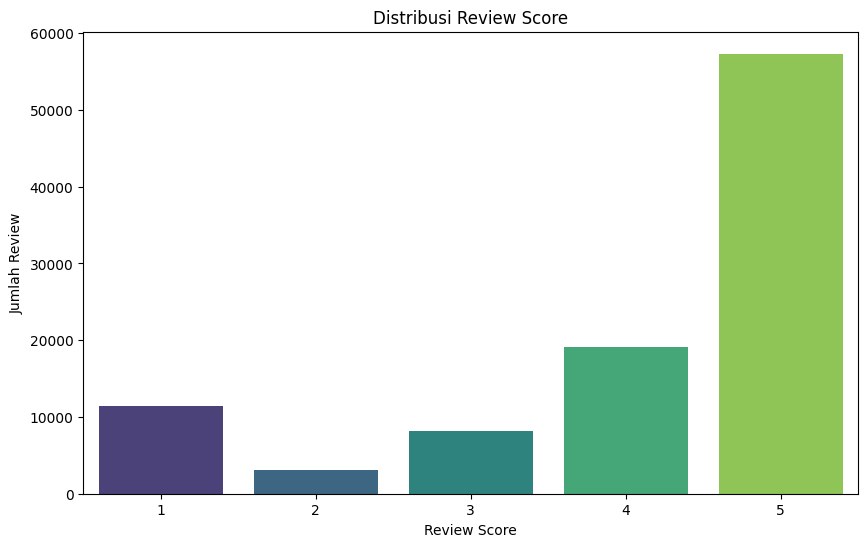

In [75]:
# Visualisasi distribusi review score
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=order_reviews_df, palette='viridis')
plt.title('Distribusi Review Score')
plt.xlabel('Review Score')
plt.ylabel('Jumlah Review')
plt.show()

Berdasarkan hasil di atas, dapat dilihat bahwa review score pelanggan dari Brazilian E-Commerce Public Dataset by Olist ini didominasi oleh score 5 dengan jumlah 57328. Diikuti dengan score 4 berjumlah 19142, 1  berjumlah 11424, 3 berjumlah 8179, kemudian 2 berjumlah 3151.

**Saya ingin menggabungkan tabel-tabel menjadi satu dataframe baru bernama "all_df". Karena sebelumnya saya sudah membuat analisis dan visualisasi tentang distribusi geografis dari "customers_df" dan rata-rata review score dari "order_reviews_df", maka saya ingin menggabungkan 2 tabel tersebut dengan 1 tabel tambahan, yaitu "orders_df" untuk mencari tahu tingkat kepuasan (berdasarkan review score) dari pelanggan pada top 10 kota yang ada.
Jadi, terdapat kolom "customer_id" yang bisa didapat dari "customers_df" dan "orders_df", Kolom "customer_city" yang bisa didapat dari "customers_df", Kolom "order_id" yang bisa didapat dari "order_reviews_df" dan "orders_df", dan Kolom "review_score" yang bisa didapat dari "order_reviews_df".**

Untuk menggabungkan tabel-tabel tersebut menjadi satu dataframe baru bernama all_df dengan tujuan menganalisis tingkat kepuasan pelanggan di top 10 kota, kita akan melakukan langkah-langkah berikut:
1. Menggabungkan customers_df dengan orders_df berdasarkan customer_id.
2. Menggabungkan hasil penggabungan pertama dengan order_reviews_df berdasarkan order_id.
3. Memfilter hasil gabungan berdasarkan top 10 kota.

In [76]:
# Menggabungkan customers_df dengan orders_df berdasarkan customer_id
merged_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')

# Menampilkan beberapa baris pertama dari hasil gabungan
print("\nMerged DataFrame (Customers + Orders):")
display(merged_df.head())


Merged DataFrame (Customers + Orders):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [77]:
# Menggabungkan hasil gabungan pertama dengan order_reviews_df berdasarkan order_id
all_df = pd.merge(merged_df, order_reviews_df, on='order_id', how='inner')

# Menampilkan beberapa baris pertama dari hasil gabungan
print("\nAll DataFrame (Merged + Order Reviews):")
display(all_df.head())


All DataFrame (Merged + Order Reviews):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,baik,baik,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5,sangat baik,sangat baik,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5ad6695d76ee186dc473c42706984d87,5,sangat baik,sangat baik,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5,sangat baik,sangat baik,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [78]:
# Menghitung jumlah pelanggan untuk setiap kota
city_distribution_all = all_df['customer_city'].value_counts()

print("Jumlah pelanggan untuk setiap kota:")
display(city_distribution_all)

Jumlah pelanggan untuk setiap kota:


customer_city
sao paulo                     15522
rio de janeiro                 6841
belo horizonte                 2776
brasilia                       2139
curitiba                       1516
                              ...  
santa quiteria do maranhao        1
pontes gestal                     1
constantina                       1
engenheiro balduino               1
eugenio de castro                 1
Name: count, Length: 4117, dtype: int64

In [79]:
# Memilih 10 kota dengan pelanggan terbanyak
top_10_cities_all = city_distribution_all.head(10).index

In [80]:
# Memfilter hasil gabungan berdasarkan top 10 kota
all_df_top_10_cities = all_df[all_df['customer_city'].isin(top_10_cities_all)]

# Menampilkan beberapa baris pertama dari hasil filter
print("\nFiltered All DataFrame (Top 10 Cities):")
display(all_df_top_10_cities.head())


Filtered All DataFrame (Top 10 Cities):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5,sangat baik,sangat baik,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5ad6695d76ee186dc473c42706984d87,5,sangat baik,sangat baik,2018-06-15,2018-06-15 12:10:59
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,bc88d3b86fa8443d42894eb7b5f0d73c,5,sangat baik,sangat baik,2018-02-21,2018-02-26 13:53:18
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20,8566d94f7bf3bedbb4ca6a29725fc382,5,sangat baik,chegou antes do prometido,2018-01-27,2018-01-30 19:18:27


In [81]:
# Menghitung jumlah review untuk setiap score
review_counts = all_df_top_10_cities['review_score'].value_counts().sort_index()

print("\nReview Counts per Score:")
print(review_counts)

# Menghitung total review
total_reviews = all_df_top_10_cities['review_score'].count()

print("\nTotal Reviews:")
print(total_reviews)

# Menghitung rata-rata review score
average_review_score = all_df_top_10_cities['review_score'].mean()

print("\nAverage Review Score:")
print(average_review_score)


Review Counts per Score:
review_score
1     4208
2     1123
3     2795
4     6553
5    20282
Name: count, dtype: int64

Total Reviews:
34961

Average Review Score:
4.074854838248334


<ipython-input-82-5eaa9b20fba5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=all_df_top_10_cities, palette='viridis')


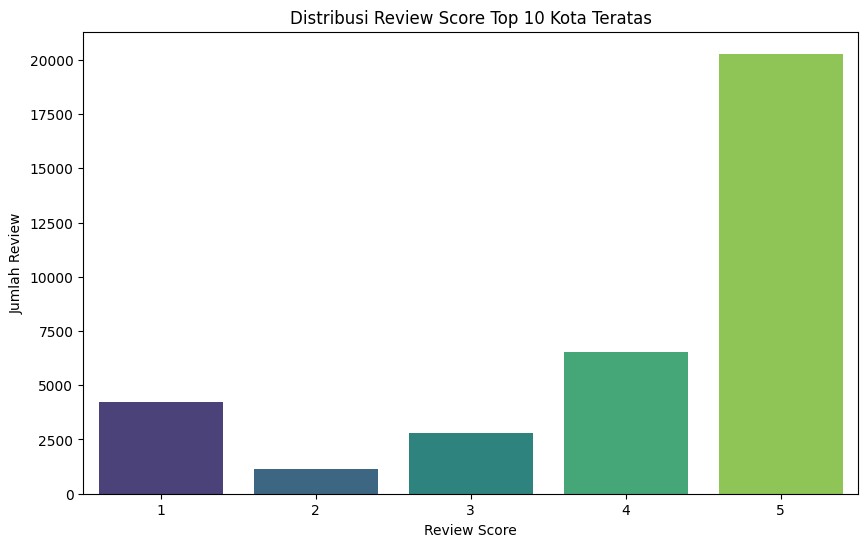

In [82]:
# Visualisasi distribusi review score untuk 10 kota dengan pelanggan terbanyak
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=all_df_top_10_cities, palette='viridis')
plt.title('Distribusi Review Score Top 10 Kota Teratas')
plt.xlabel('Review Score')
plt.ylabel('Jumlah Review')
plt.show()

Berdasarkan hasil review score dari top 10 kota dengan pelanggan terbanyak, didapatkan hasil yang mirip dengan review score secara keseluruhan. Didominasi oleh score 5 dan diikuti dengan score 4, 1, 3, kemudian 2 yang tidak memiliki perbedaan cukup signifikan. Rata-rata review scorenya pun masih di sekitar 4, lebih tepatnya 4.07 (4.09 di keseluruhan) yang berarti kepuasan pelanggan cukup baik.

In [83]:
# Menyimpan hasil gabungan ke dalam file CSV
all_df_top_10_cities.to_csv('all_data.csv', index=False)

## Conclusion

- Conclution pertanyaan 1

Berdasarkan hasil exploratory hingga explanatory dengan visualisasi di atas, dapat dilihat bahwa Analisis Demografi Pelanggan dapat menjawab pertanyaan yang pertama, yaitu "Bagaimana distribusi geografis pelanggan berdasarkan kotanya?". Persebaran pelanggan dari Brazilian E-Commerce Public Dataset by Olist terlihat didominasi oleh pelanggan dari kota sao paulo. Hampir 3x lipat dari urutan kota kedua, yaitu rio de janeiro. Jumlah pelanggan dari kota rio de janeiro pun hampir 3x lipat dari urutan kota ketiga juga, yaitu belo horizonte. Selanjutnya, di urutan ke-3 ke bawah perbedaanya sudah tidak signifikan.

- Conclution pertanyaan 2

Berdasarkan hasil exploratory hingga explanatory dengan visualisasi di atas, dapat dilihat bahwa Analisis Kepuasan Pelanggan dapat menjawab pertanyaan kedua, yaitu "Bagaimana distribusi jumlah review berdasarkan review score yang diberikan oleh pelanggan?". Review score pelanggan dari Brazilian E-Commerce Public Dataset by Olist terlihat didominasi oleh score 5. Diikuti dengan score 4, 1, 3, kemudian 2 yang tidak memiliki perbedaan cukup signifikan.